# Анализ данных базы пользователей Netflix.

В наборе данных представлен краткий обзор выборки пользователей Netflix, демонстрирующий различные аспекты пользовательских подписок, доходов, сведений об учетной записи и активности. Каждая строка представляет уникального пользователя, идентифицируемого по его идентификатору пользователя. Набор данных включает в себя такую информацию, как тип подписки пользователя (Базовая, стандартная или Премиум), ежемесячный доход, получаемый от подписки, дата подключения к Netflix (Дата присоединения), дата последнего платежа (Дата последнего платежа) и страна, в которой он находится.

Дополнительные столбцы, позволяющие получить представление о поведении и предпочтениях пользователей. В этих столбцах указаны тип устройства (например, Smart TV, мобильный телефон, настольный компьютер, планшет). Набор данных служит синтетическим представлением и не отражает фактические данные о пользователях Netflix. 

Цель - понять тенденции, предпочтения пользователей и получение доходов в рамках гипотетической базы пользователей Netflix.

### 1. Информация о данных

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
data = pd.read_csv('data/Netflix Userbase.csv')

In [152]:
data

User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0           1             Basic               10  15-01-22          10-06-23   
1           2           Premium               15  05-09-21          22-06-23   
2           3          Standard               12  28-02-23          27-06-23   
3           4          Standard               12  10-07-22          26-06-23   
4           5             Basic               10  01-05-23          28-06-23   
...       ...               ...              ...       ...               ...   
2495     2496           Premium               14  25-07-22          12-07-23   
2496     2497             Basic               15  04-08-22          14-07-23   
2497     2498          Standard               12  09-08-22          15-07-23   
2498     2499          Standard               13  12-08-22          12-07-23   
2499     2500             Basic               15  13-08-22          12-07-23   

             Country  Age  Gender      Device Plan Duration  
0      United States   28    Male  Smartphone       1 Month  
1             Canada   35  Female      Tablet       1 Month  
2     United Kingdom   42    Male    Smart TV       1 Month  
3          Australia   51  Female      Laptop       1 Month  
4            Germany   33    Male  Smartphone       1 Month  
...              ...  ...     ...         ...           ...  
2495           Spain   28  Female    Smart TV       1 Month  
2496           Spain   33  Female    Smart TV       1 Month  
2497   United States   38    Male      Laptop       1 Month  
2498          Canada   48  Female      Tablet       1 Month  
2499   United States   35  Female    Smart TV       1 Month  

[2500 rows x 10 columns]

- 'User ID' - Идентификатор пользователя
- 'Subscription Type' - тип подписки (базовая, стандартная, премиум)
- 'Monthly Revenue' - Месячный доход
- 'Join Date' - Дата присоединения
- 'Last Payment Date' - Дата последнего платежа
- 'Country' - Страна
- 'Age' - Возраст
- 'Gender' - Пол
- 'Device' - Тип устройства
- 'Plan Duration' - Продолжительность подписки

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [154]:
data['Join Date'] = pd.to_datetime(data['Join Date'], format='%d-%m-%y')
data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'], format='%d-%m-%y')

Изменен тип данных в признаках: 'Join Date' и 'Last Payment Date'.

In [156]:
data.isna().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [157]:
data.duplicated().sum()

0

Пропусков и дубликатов в данных не найдено.

In [158]:
data['Plan Duration'].nunique()

1

In [159]:
data.drop('Plan Duration', axis=1, inplace=True)

Признак 'Plan Duration' был удалён, поскольку он содержит лишь одно уникальное значение и не несёт информативной нагрузки.

In [160]:
data['User ID'].nunique() / len(data)

1.0

In [161]:
data.set_index('User ID', inplace=True)

В качестве индексов выбраны идентификаторы пользователей, поскольку они уникальны и не имеют дубликатов в таблице.

### 2. Анализ данных

<Axes: xlabel='Subscription Type', ylabel='count'>

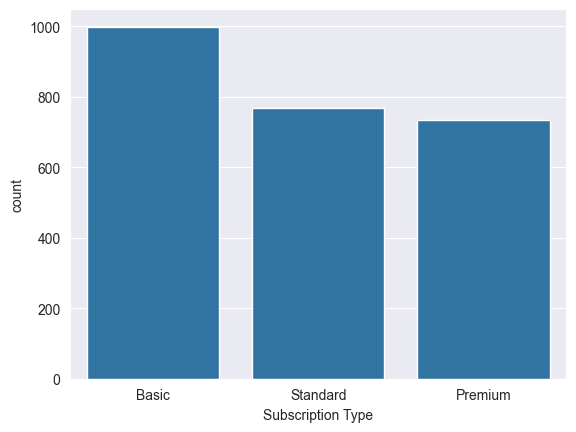

In [162]:
sub_plan = data['Subscription Type'].value_counts()
sns.barplot(data=sub_plan)

Преобладает базовый тип подписки.

<Axes: xlabel='year_join', ylabel='count'>

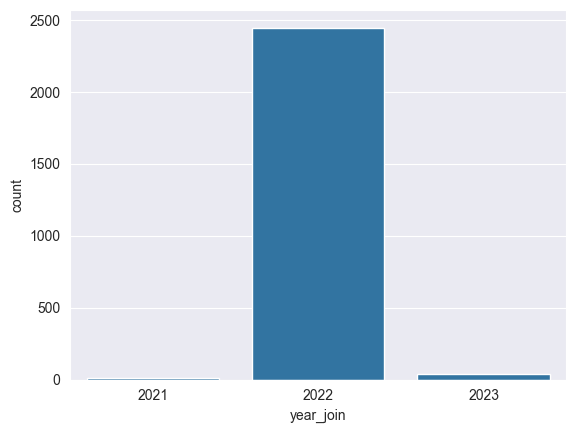

In [163]:
data['year_join'] = data['Join Date'].dt.year
sub_year = data['year_join'].value_counts()
sns.barplot(data=sub_year)

Большинство аудитории присоединилось в 2022 году, что, возможно, связано с крупной рекламной кампанией.

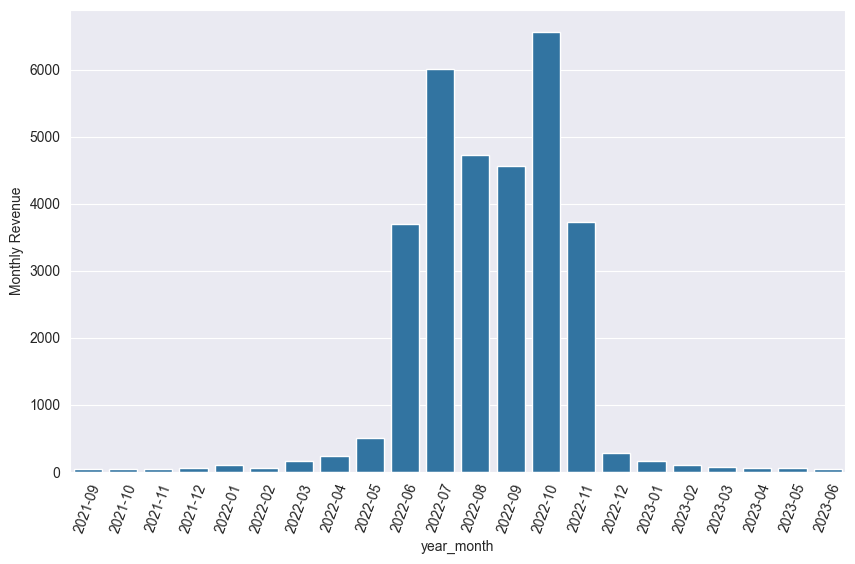

In [164]:
data['month_join'] = data['Join Date'].dt.month
revenue_year = data.groupby(['year_join', 'month_join'])['Monthly Revenue'].sum()
revenue_year = revenue_year.reset_index()
revenue_year['year_month'] = revenue_year['year_join'].astype(str) + '-' + revenue_year['month_join'].astype(str).str.zfill(2)

fig = plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_year, x='year_month', y='Monthly Revenue')
plt.xticks(rotation=70)
plt.show()

Большая часть прибыли в октябре 2022 года.

<Axes: xlabel='Subscription Type', ylabel='Monthly Revenue'>

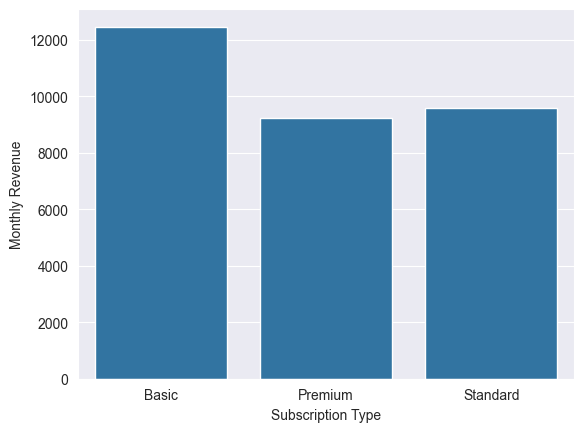

In [165]:
subtype_revenue = data.groupby('Subscription Type')['Monthly Revenue'].sum()
sns.barplot(data=subtype_revenue)

Суммарно большую прибыль принес тип подписки 'Basic'.

In [166]:
data['member_months'] = (data['Last Payment Date'] - data['Join Date']).dt.days // 30
data['member_months'] = data['member_months'].apply(lambda x: x if x > 1 else 1)
data

Subscription Type  Monthly Revenue  Join Date Last Payment Date  \
User ID                                                                   
1                   Basic               10 2022-01-15        2023-06-10   
2                 Premium               15 2021-09-05        2023-06-22   
3                Standard               12 2023-02-28        2023-06-27   
4                Standard               12 2022-07-10        2023-06-26   
5                   Basic               10 2023-05-01        2023-06-28   
...                   ...              ...        ...               ...   
2496              Premium               14 2022-07-25        2023-07-12   
2497                Basic               15 2022-08-04        2023-07-14   
2498             Standard               12 2022-08-09        2023-07-15   
2499             Standard               13 2022-08-12        2023-07-12   
2500                Basic               15 2022-08-13        2023-07-12   

                Country  Age  Gender      Device  year_join  month_join  \
User ID                                                                   
1         United States   28    Male  Smartphone       2022           1   
2                Canada   35  Female      Tablet       2021           9   
3        United Kingdom   42    Male    Smart TV       2023           2   
4             Australia   51  Female      Laptop       2022           7   
5               Germany   33    Male  Smartphone       2023           5   
...                 ...  ...     ...         ...        ...         ...   
2496              Spain   28  Female    Smart TV       2022           7   
2497              Spain   33  Female    Smart TV       2022           8   
2498      United States   38    Male      Laptop       2022           8   
2499             Canada   48  Female      Tablet       2022           8   
2500      United States   35  Female    Smart TV       2022           8   

         member_months  
User ID                 
1                   17  
2                   21  
3                    3  
4                   11  
5                    1  
...                ...  
2496                11  
2497                11  
2498                11  
2499                11  
2500                11  

[2500 rows x 11 columns]

Добавлен новый признак, который показывает, в течение скольки месяцев каждый пользователей является подписанным.

<Axes: ylabel='member_months'>

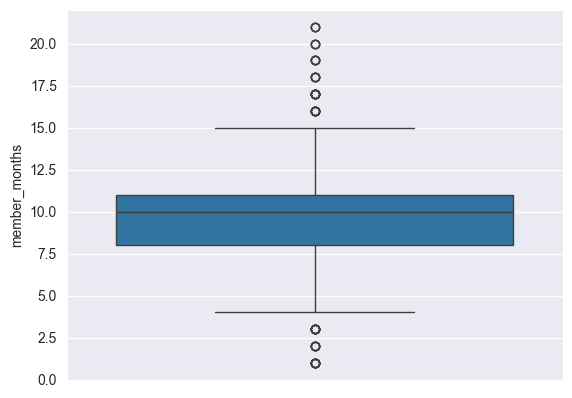

In [168]:
sns.boxplot(y='member_months', data=data)

Большая часть аудитории подписана от 5 до 15 месяцев. Медианное значение - 10 месяцев. Так же в данных о квремени подписки каждого пользователя есть выбросы как в большую, так и в меньшую сторону. 

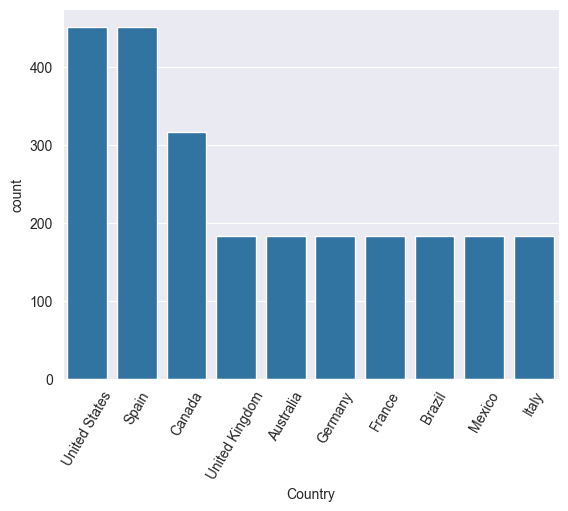

In [169]:
country = data['Country'].value_counts()
sns.barplot(data=country)
plt.xticks(rotation=60)
plt.show()

Преобладающие страны пользователей, имеющих подписку - США, Испания и Канада. Аудитория в других странах распределена равномерно.

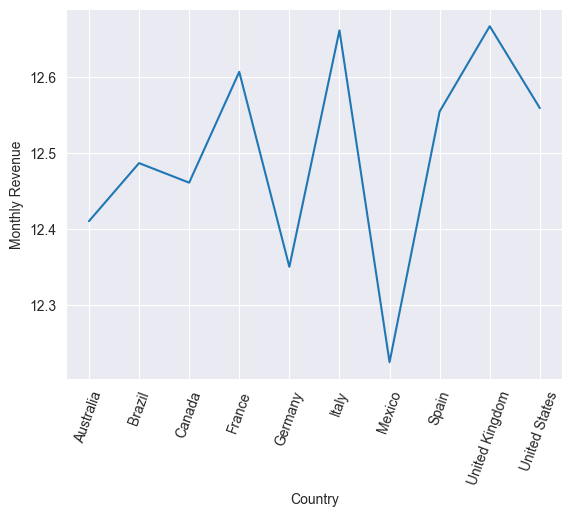

In [170]:
revenue_contry = data.groupby('Country')['Monthly Revenue'].mean()

sns.lineplot(data=revenue_contry)
plt.xticks(rotation=70)
plt.show()

Мексика имеет наименьшую среднюю прибыль на пользователя в месяц, в то время как Италия, США и Франция демонстрируют наивысшие показатели, приблизительно равные 12.6.

<Axes: xlabel='User ID', ylabel='Gender'>

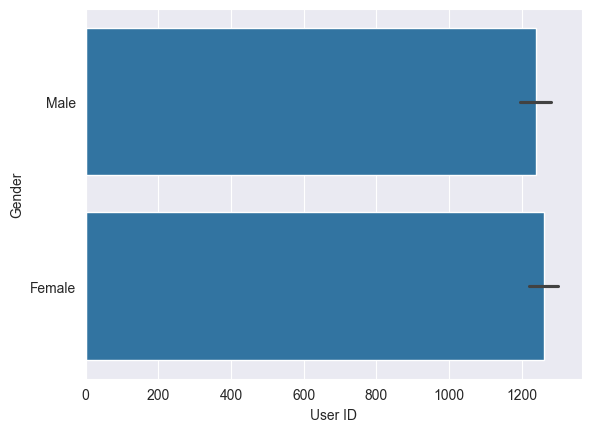

In [171]:
sns.barplot(data['Gender'])

Пользователи одинаково распределены в зависимости от гендера.

In [172]:
data['Age'].min(), data['Age'].max()

(26, 51)

In [173]:
data['age_status'] = data['Age'].apply(lambda x: '(26;33)' if x <= 34 else '(35;42)' if x > 34 and x <= 42 else '(43;51)')
data

Subscription Type  Monthly Revenue  Join Date Last Payment Date  \
User ID                                                                   
1                   Basic               10 2022-01-15        2023-06-10   
2                 Premium               15 2021-09-05        2023-06-22   
3                Standard               12 2023-02-28        2023-06-27   
4                Standard               12 2022-07-10        2023-06-26   
5                   Basic               10 2023-05-01        2023-06-28   
...                   ...              ...        ...               ...   
2496              Premium               14 2022-07-25        2023-07-12   
2497                Basic               15 2022-08-04        2023-07-14   
2498             Standard               12 2022-08-09        2023-07-15   
2499             Standard               13 2022-08-12        2023-07-12   
2500                Basic               15 2022-08-13        2023-07-12   

                Country  Age  Gender      Device  year_join  month_join  \
User ID                                                                   
1         United States   28    Male  Smartphone       2022           1   
2                Canada   35  Female      Tablet       2021           9   
3        United Kingdom   42    Male    Smart TV       2023           2   
4             Australia   51  Female      Laptop       2022           7   
5               Germany   33    Male  Smartphone       2023           5   
...                 ...  ...     ...         ...        ...         ...   
2496              Spain   28  Female    Smart TV       2022           7   
2497              Spain   33  Female    Smart TV       2022           8   
2498      United States   38    Male      Laptop       2022           8   
2499             Canada   48  Female      Tablet       2022           8   
2500      United States   35  Female    Smart TV       2022           8   

         member_months age_status  
User ID                            
1                   17    (26;33)  
2                   21    (35;42)  
3                    3    (35;42)  
4                   11    (43;51)  
5                    1    (26;33)  
...                ...        ...  
2496                11    (26;33)  
2497                11    (26;33)  
2498                11    (35;42)  
2499                11    (43;51)  
2500                11    (35;42)  

[2500 rows x 12 columns]

Возраст пользователей разделен на три категории: младше 34 лет, от 35 до 42 лет и старше 42 лет. Деление на три категории сделано одинаковыми отрезками возраста исходя из наименьшего и наибольшего возраста пользователей в данных.

<Axes: xlabel='age_status', ylabel='count'>

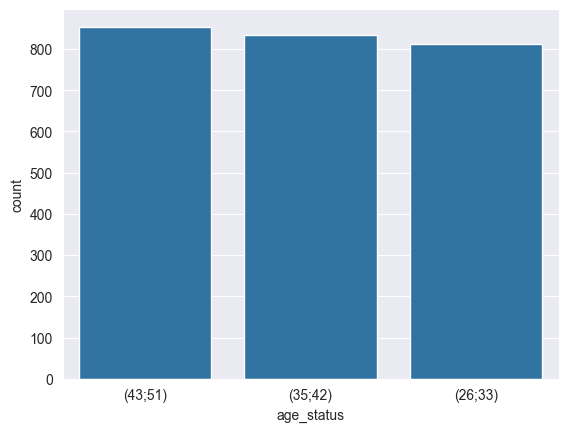

In [174]:
sns.barplot(data['age_status'].value_counts())

В целом, возраст аудитории распрделен одинаково. Однако, немного преобладающий возраст: от 43 до 51.

<Axes: xlabel='Device', ylabel='count'>

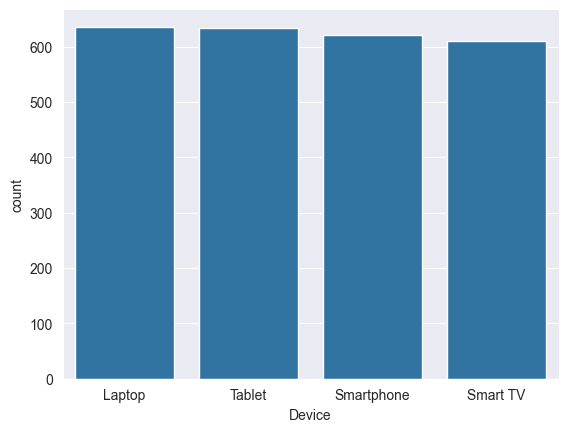

In [175]:
device = data['Device'].value_counts()
sns.barplot(data=device)

В данных не замечена тенденция к использованию определенного типа устройства.

<Axes: xlabel='Device', ylabel='member_months'>

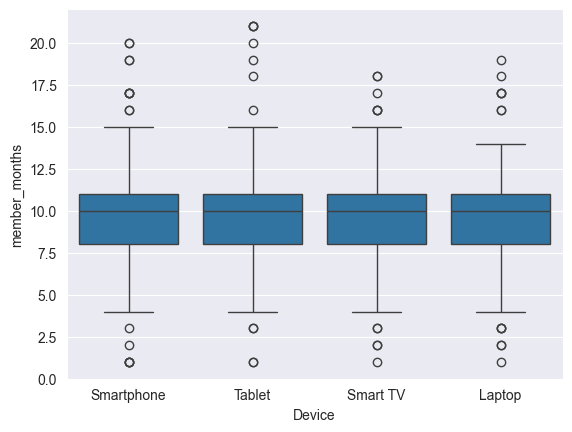

In [176]:
sns.boxplot(data, x='Device', y='member_months')

В среднем, продолжительность подписки пользователей одинакова независимо от типа устройства. Однако, пользователи смартфонов чаще имеют более короткий срок подписки, возможно, потому что предпочитают просмотр на Smart TV, что более комфортно. В то время как пользователи планшетов имеют более длительный срок подписки, что может быть связано с их мобильностью и лучшим разрешением экрана по сравнению со смартфонами.

In [177]:
def get_continent(country):
    if country in {"United States", "Canada", "Mexico"}:
        return "North America"
    if country in {"France", "Germany", "United Kingdom", "Italy", "Spain"}:
        return "Europe"
    if country == "Brazil":
        return "South America"
    if country == "Australia":
        return "Australia"
    return "Africa / Asia"

In [178]:
data['Continent'] = data['Country'].apply(lambda x: get_continent(x))

Добавлен признак о континенте пользователей, исходя из страны.

<Axes: xlabel='Continent'>

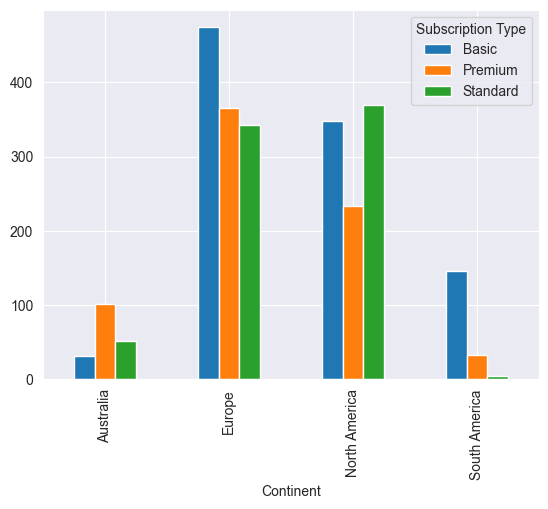

In [179]:
pd.crosstab(data['Continent'], data['Subscription Type'], margins=False).plot(kind='bar')

В разных регионах мира преобладают различные типы подписок на платформе Netflix. В частности, в Австралии наиболее популярен тип подписки "Премиум", в Европе - "Базовый", в Северной Америке - "Стандартный", а в Южной Америке также преобладает тип подписки "Базовый". Это свидетельствует о различиях в предпочтениях пользователей в зависимости от географического расположения.

In [181]:
revenue_per_user = pd.DataFrame()
revenue_per_user.index = data.index
revenue_per_user['Revenue'] = data['Monthly Revenue'] * data['member_months']
revenue_per_user

Revenue
User ID         
1            170
2            315
3             36
4            132
5             10
...          ...
2496         154
2497         165
2498         132
2499         143
2500         165

[2500 rows x 1 columns]

Для вычисления дохода с каждого пользователя создан датафрейм revenue_per_user. В этом датафрейме индексом установлены идентификаторы пользователей, а в столбце 'Revenue' вычисляется общий доход с каждого пользователя, умножая ежемесячный доход на количество месяцев подписки.

In [182]:
GMV = revenue_per_user['Revenue'].sum()
GMV

307010

Совокупная выручка от продажи товаров и услуг.

In [212]:
ARPU = GMV / len(data.index.unique())
ARPU

122.804

Средний доход с каждого клиента: количество денег, которое компания получает от каждого пользователя.

In [213]:
data['repeat'] = data['member_months'].apply(lambda x: 1 if x > 1 else 0)
repeat_customers = data['repeat'].sum() / len(data)
repeat_customers

0.9968

Повторные покупатели. Показывает долю пользователей, у которых больше одного месяца подписки на сервис.  

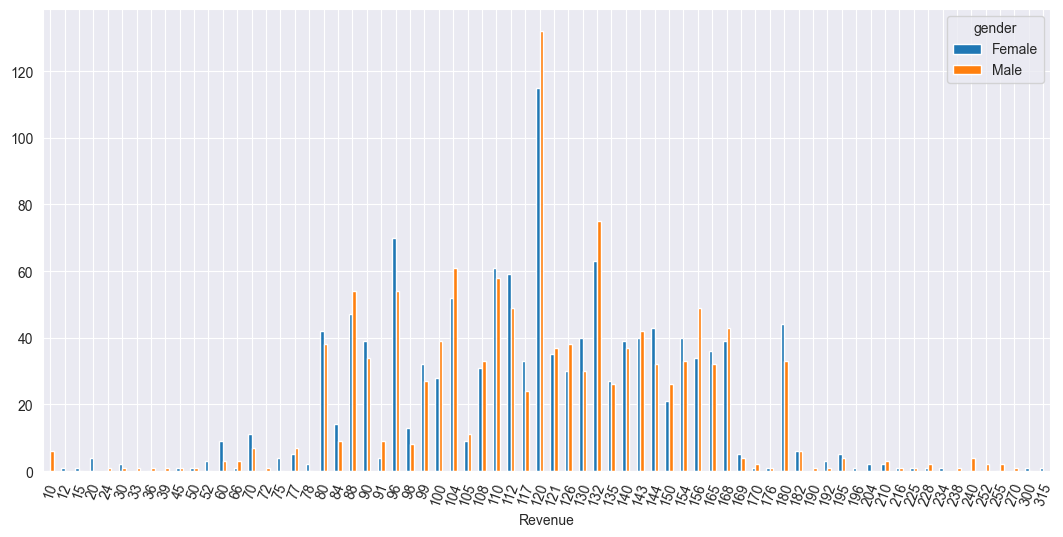

In [183]:
revenue_per_user['gender'] = data['Gender']
crosstab_revenue = pd.crosstab(revenue_per_user['Revenue'], revenue_per_user['gender'], margins=False)

crosstab_revenue.plot(kind='bar', figsize=(13, 6))
plt.xticks(rotation=70)
plt.show()

Распределение выручки между пользователями разного пола. Распрделение стремится к нормальному в каждой из групп. 

*Нулевая гипотеза (H0):* Средняя выручка мужчин равна средней выручке женщин.


*Альтернативная гипотеза (H1):* Средняя выручка от мужчин не равна средней выручке от женщин.

In [184]:
from scipy import stats

men_revenue = revenue_per_user[revenue_per_user['gender'] == 'Male']['Revenue']
women_revenue = revenue_per_user[revenue_per_user['gender'] == 'Female']['Revenue']

t_stat, p_value = stats.ttest_ind(men_revenue, women_revenue)

print(f"t-статистика: {t_stat}")
print(f"p-значение: {p_value}")

t-статистика: 0.7613288027146795
p-значение: 0.44653256564155375


In [185]:
if p_value < 0.05:
    print('Cуществует статистически значимая разница между средней выручкой мужчин и средней выручкой женщин.')
else:
    print('Статистически значимой разницы между средней выручкой мужчин и средней выручкой женщин нет.')

Статистически значимой разницы между средней выручкой мужчин и средней выручкой женщин нет.


In [216]:
data.describe()

Monthly Revenue                   Join Date  \
count      2500.000000                        2500   
mean         12.508400  2022-08-28 18:02:52.800000   
min          10.000000         2021-09-05 00:00:00   
25%          11.000000         2022-07-15 00:00:00   
50%          12.000000         2022-08-31 00:00:00   
75%          14.000000         2022-10-17 00:00:00   
max          15.000000         2023-06-14 00:00:00   
std           1.686851                         NaN   

                Last Payment Date          Age    year_join   month_join  \
count                        2500  2500.000000  2500.000000  2500.000000   
mean   2023-07-03 08:54:31.680000    38.795600  2022.009600     8.321600   
min           2023-06-10 00:00:00    26.000000  2021.000000     1.000000   
25%           2023-06-29 00:00:00    32.000000  2022.000000     7.000000   
50%           2023-07-03 00:00:00    39.000000  2022.000000     8.000000   
75%           2023-07-08 00:00:00    45.000000  2022.000000    10.000000   
max           2023-07-15 00:00:00    51.000000  2023.000000    12.000000   
std                           NaN     7.171778     0.143931     1.966449   

       member_months       repeat  last_payment_month          sub  
count     2500.00000  2500.000000         2500.000000  2500.000000  
mean         9.81840     0.996800            6.653600     0.653600  
min          1.00000     0.000000            6.000000     0.000000  
25%          8.00000     1.000000            6.000000     0.000000  
50%         10.00000     1.000000            7.000000     1.000000  
75%         11.00000     1.000000            7.000000     1.000000  
max         21.00000     1.000000            7.000000     1.000000  
std          2.10542     0.056489            0.475918     0.475918

1. Monthly Revenue (Ежемесячный доход):
    - Средний ежемесячный доход составляет примерно 12.51 единицы.
    - Минимальный ежемесячный доход составляет 10 единиц.
    - Максимальный ежемесячный доход составляет 15 единиц.
    - Стандартное отклонение ежемесячного дохода равно приблизительно 1.69 единицы.

2. Join Date (Дата присоединения):
    - Средняя дата присоединения клиентов - 28 августа 2022 года.
    - Минимальная дата присоединения - 5 сентября 2021 года.
    - Максимальная дата присоединения - 14 июня 2023 года.
    
3. Last Payment Date (Дата последнего платежа):
    - Средняя дата последнего платежа - 3 июля 2023 года.
    - Минимальная дата последнего платежа - 10 июня 2023 года.
    - Максимальная дата последнего платежа - 15 июля 2023 года.

4. Age (Возраст):
    - Средний возраст клиентов составляет около 38.8 лет.
    - Минимальный возраст клиентов - 26 лет.
    - Максимальный возраст клиентов - 51 год.
    - Стандартное отклонение возраста клиентов равно приблизительно 7.17 лет.

5. member_months (Срок членства в месяцах):
    - Средний срок, на который клиент остаётся в программе, составляет около 9.82 месяца.

<Axes: >

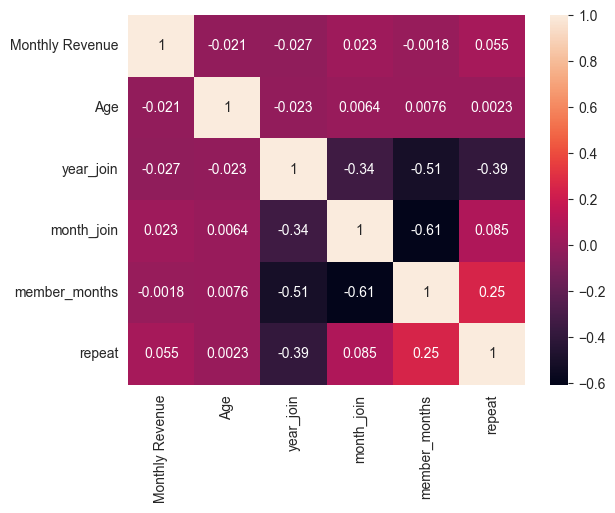

In [62]:
sns.heatmap(data[data.select_dtypes(include=['int', 'float']).columns].corr(), annot=True)

Корреляция между численными признаками. Сильной связи между какими-либо признаками не наблюдается.

### 3. Обучение модели
*Продлит ли пользователь подписку в июле?*

In [189]:
data['last_payment_month'] = data['Last Payment Date'].dt.month
data[data['last_payment_month'] == 7]

Subscription Type  Monthly Revenue  Join Date Last Payment Date  \
User ID                                                                   
566               Premium               11 2022-10-11        2023-07-01   
628              Standard               10 2022-10-09        2023-07-01   
632                 Basic               13 2022-09-23        2023-07-01   
636               Premium               10 2022-10-28        2023-07-01   
638              Standard               11 2022-11-16        2023-07-01   
...                   ...              ...        ...               ...   
2496              Premium               14 2022-07-25        2023-07-12   
2497                Basic               15 2022-08-04        2023-07-14   
2498             Standard               12 2022-08-09        2023-07-15   
2499             Standard               13 2022-08-12        2023-07-12   
2500                Basic               15 2022-08-13        2023-07-12   

                Country  Age  Gender      Device  year_join  month_join  \
User ID                                                                   
566       United States   45    Male      Tablet       2022          10   
628      United Kingdom   42    Male  Smartphone       2022          10   
632              Brazil   39    Male  Smartphone       2022           9   
636               Spain   33  Female    Smart TV       2022          10   
638       United States   38    Male      Tablet       2022          11   
...                 ...  ...     ...         ...        ...         ...   
2496              Spain   28  Female    Smart TV       2022           7   
2497              Spain   33  Female    Smart TV       2022           8   
2498      United States   38    Male      Laptop       2022           8   
2499             Canada   48  Female      Tablet       2022           8   
2500      United States   35  Female    Smart TV       2022           8   

         member_months age_status      Continent  repeat  last_payment_month  
User ID                                                                       
566                  8    (43;51)  North America       1                   7  
628                  8    (35;42)         Europe       1                   7  
632                  9    (35;42)  South America       1                   7  
636                  8    (26;33)         Europe       1                   7  
638                  7    (35;42)  North America       1                   7  
...                ...        ...            ...     ...                 ...  
2496                11    (26;33)         Europe       1                   7  
2497                11    (26;33)         Europe       1                   7  
2498                11    (35;42)  North America       1                   7  
2499                11    (43;51)  North America       1                   7  
2500                11    (35;42)  North America       1                   7  

[1634 rows x 15 columns]

In [190]:
data['sub'] = data['last_payment_month'].apply(lambda x: 1 if x == 7 else 0)
data

Subscription Type  Monthly Revenue  Join Date Last Payment Date  \
User ID                                                                   
1                   Basic               10 2022-01-15        2023-06-10   
2                 Premium               15 2021-09-05        2023-06-22   
3                Standard               12 2023-02-28        2023-06-27   
4                Standard               12 2022-07-10        2023-06-26   
5                   Basic               10 2023-05-01        2023-06-28   
...                   ...              ...        ...               ...   
2496              Premium               14 2022-07-25        2023-07-12   
2497                Basic               15 2022-08-04        2023-07-14   
2498             Standard               12 2022-08-09        2023-07-15   
2499             Standard               13 2022-08-12        2023-07-12   
2500                Basic               15 2022-08-13        2023-07-12   

                Country  Age  Gender      Device  year_join  month_join  \
User ID                                                                   
1         United States   28    Male  Smartphone       2022           1   
2                Canada   35  Female      Tablet       2021           9   
3        United Kingdom   42    Male    Smart TV       2023           2   
4             Australia   51  Female      Laptop       2022           7   
5               Germany   33    Male  Smartphone       2023           5   
...                 ...  ...     ...         ...        ...         ...   
2496              Spain   28  Female    Smart TV       2022           7   
2497              Spain   33  Female    Smart TV       2022           8   
2498      United States   38    Male      Laptop       2022           8   
2499             Canada   48  Female      Tablet       2022           8   
2500      United States   35  Female    Smart TV       2022           8   

         member_months age_status      Continent  repeat  last_payment_month  \
User ID                                                                        
1                   17    (26;33)  North America       1                   6   
2                   21    (35;42)  North America       1                   6   
3                    3    (35;42)         Europe       1                   6   
4                   11    (43;51)      Australia       1                   6   
5                    1    (26;33)         Europe       0                   6   
...                ...        ...            ...     ...                 ...   
2496                11    (26;33)         Europe       1                   7   
2497                11    (26;33)         Europe       1                   7   
2498                11    (35;42)  North America       1                   7   
2499                11    (43;51)  North America       1                   7   
2500                11    (35;42)  North America       1                   7   

         sub  
User ID       
1          0  
2          0  
3          0  
4          0  
5          0  
...      ...  
2496       1  
2497       1  
2498       1  
2499       1  
2500       1  

[2500 rows x 16 columns]

In [191]:
len(data[data['sub'] == 1]) / len(data), len(data[data['sub'] == 0]) / len(data)

(0.6536, 0.3464)

В данных присутствует дисбаланс классов.

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report,make_scorer

In [199]:
df = data.copy()
df.drop(['Join Date', 'Last Payment Date', 'last_payment_month', 'member_months', 'month_join'], axis=1, inplace=True)
cat_cols = list(df.select_dtypes(include='object').columns)

In [200]:
cat_cols

['Subscription Type', 'Country', 'Gender', 'Device', 'age_status', 'Continent']

Категориальные колонки были выделены с целью обеспечить возможность модели Catboost корректно обработать их.

In [201]:
X, y = df.drop('sub', axis=1), df['sub']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Разделение данных на тренировочную и тестовую выборки.

In [197]:
from catboost import CatBoostClassifier

In [287]:
catboost = CatBoostClassifier(cat_features=cat_cols, iterations=200, random_state=42)
catboost.fit(X_train, y_train)

Learning rate set to 0.058947
0:	learn: 0.6851790	total: 11.6ms	remaining: 2.32s
1:	learn: 0.6784765	total: 21.8ms	remaining: 2.15s
2:	learn: 0.6742393	total: 28.6ms	remaining: 1.88s
3:	learn: 0.6677805	total: 49.3ms	remaining: 2.41s
4:	learn: 0.6624022	total: 73.5ms	remaining: 2.86s
5:	learn: 0.6581628	total: 86.2ms	remaining: 2.79s
6:	learn: 0.6555488	total: 96.4ms	remaining: 2.66s
7:	learn: 0.6511505	total: 132ms	remaining: 3.17s
8:	learn: 0.6470073	total: 149ms	remaining: 3.17s
9:	learn: 0.6452521	total: 155ms	remaining: 2.95s
10:	learn: 0.6418785	total: 182ms	remaining: 3.13s
11:	learn: 0.6395559	total: 193ms	remaining: 3.03s
12:	learn: 0.6367780	total: 217ms	remaining: 3.12s
13:	learn: 0.6353431	total: 243ms	remaining: 3.23s
14:	learn: 0.6332262	total: 264ms	remaining: 3.25s
15:	learn: 0.6309002	total: 291ms	remaining: 3.35s
16:	learn: 0.6283912	total: 334ms	remaining: 3.6s
17:	learn: 0.6269133	total: 352ms	remaining: 3.56s
18:	learn: 0.6253179	total: 380ms	remaining: 3.62s
19:	l

**В качестве метрик выбраны ROC AUC и отчет о классификации (classification report) из-за дисбаланса классов, что обеспечивает более робастную оценку производительности модели. ROC AUC позволяет учесть эффективность модели при различных пороговых значениях, а classification report предоставляет информацию о точности, полноте и F1-мере для каждого класса, что особенно важно при несбалансированных данных.**

In [289]:
roc_auc_score(y_test, catboost.predict(X_test))

0.5342915035373309

Показатель ROC AUC для модели CatBoost составляет 0.5343, что указывает на хорошую способность различать положительные и отрицательные классы.

In [290]:
print(classification_report(y_test, catboost.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.08      0.14       211
           1       0.68      0.99      0.81       414

    accuracy                           0.68       625
   macro avg       0.76      0.53      0.47       625
weighted avg       0.73      0.68      0.58       625



Модель CatBoost показывает хорошие результаты в классификации положительных объектов (класс 1) с точностью 0.68 и полнотой 0.99, что указывает на высокий уровень обнаружения истинных положительных объектов. Однако, точность классификации отрицательных объектов (класс 0) не настолько высока (0.84), что может указывать на тенденцию модели к неверному выявлению отрицательных случаев. В среднем, модель имеет F1-меру 0.81 для положительного класса и 0.47 для общего среднего, что подчеркивает баланс между точностью и полнотой.

In [292]:
from sklearn.linear_model import LogisticRegression

In [293]:
lin_data = df.copy()
for col in cat_cols:
    dummie = pd.get_dummies(data[col], prefix=col)
    lin_data.drop(col, axis=1, inplace=True)
    lin_data = pd.concat([lin_data, dummie], axis=1).reset_index(drop=True)

Были созданы  дамми-признаки на основе категориальных признаков.

In [294]:
lin_data.isna().sum()

Monthly Revenue               1
Age                           1
year_join                     1
repeat                        1
sub                           1
Subscription Type_Basic       1
Subscription Type_Premium     1
Subscription Type_Standard    1
Country_Australia             1
Country_Brazil                1
Country_Canada                1
Country_France                1
Country_Germany               1
Country_Italy                 1
Country_Mexico                1
Country_Spain                 1
Country_United Kingdom        1
Country_United States         1
Gender_Female                 1
Gender_Male                   1
Device_Laptop                 1
Device_Smart TV               1
Device_Smartphone             1
Device_Tablet                 1
age_status_(26;33)            1
age_status_(35;42)            1
age_status_(43;51)            1
Continent_Australia           1
Continent_Europe              1
Continent_North America       1
Continent_South America       1
dtype: i

После создания дамми-признаков на основе категориальных признаков обнаружен один пропуск во всех колонках, который можно удалить, поскольку его количество незначительно.

In [295]:
lin_data.dropna(axis=0, how='any', inplace=True)

In [296]:
X_lin, y_lin= lin_data.drop('sub', axis=1), lin_data['sub']
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.25, random_state=42)

Разделение данных на тренировочную и тестовую выборки.

In [308]:
log_reg = LogisticRegression(random_state=42, max_iter=1500)
log_reg.fit(X_train_lin, y_train_lin)

LogisticRegression(max_iter=1500, random_state=42)

In [309]:
roc_auc_score(y_test, log_reg.predict(X_test_lin))

0.5011161480870939

Модель логистической регрессии имеет показатель ROC AUC 0.5, что равно случайному угадыванию.

In [310]:
print(classification_report(y_test, log_reg.predict(X_test_lin)))

              precision    recall  f1-score   support

           0       0.40      0.01      0.02       211
           1       0.66      0.99      0.79       414

    accuracy                           0.66       625
   macro avg       0.53      0.50      0.41       625
weighted avg       0.57      0.66      0.53       625



Логистическая регрессия имеет высокую точность в определении положительных объектов (0.66), однако, ее способность обнаруживать отрицательные случаи низкая (0.01). Общая F1-мера (0.41) указывает на слабость модели в обработке отрицательных сценариев.

In [311]:
from lightgbm import LGBMClassifier

In [312]:
df_cats = df.copy()
for col in cat_cols:
    df_cats[col] = df_cats[col].astype('category')

In [313]:
X_cats = df_cats.drop('sub', axis=1)
X_train_cats, X_test_cats, = train_test_split(X_cats, test_size=0.25, random_state=42)

Разделение данных на тренировочную и тестовую выборки.

In [318]:
lgbm = LGBMClassifier(random_state=42, n_estimators=200)
lgbm.fit(X_train_cats, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1220, number of negative: 655
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 1875, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.650667 -> initscore=0.621971
[LightGBM] [Info] Start training from score 0.621971


LGBMClassifier(n_estimators=200, random_state=42)

In [319]:
roc_auc_score(y_test, lgbm.predict(X_test_cats))

0.511562149415024

 Модель LGBM показывает результат 0.512, который также находится выше случайного угадывания, но ниже, чем у CatBoost.

In [320]:
print(classification_report(y_test, lgbm.predict(X_test_cats)))

              precision    recall  f1-score   support

           0       0.36      0.30      0.33       211
           1       0.67      0.72      0.69       414

    accuracy                           0.58       625
   macro avg       0.51      0.51      0.51       625
weighted avg       0.56      0.58      0.57       625



Модель имеет общую точность 0.58, с более высокой точностью и полнотой для класса 1 (точность 0.67, полнота 0.72) по сравнению с классом 0 (точность 0.36, полнота 0.30). Это указывает на возможный дисбаланс классов. Macro average F1-score составляет 0.51, что указывает на среднюю производительность модели по всем классам.

In [321]:
from xgboost import XGBClassifier

In [322]:
xgboost = XGBClassifier(enable_categorical=True, n_estimators=200, random_state=42)
xgboost.fit(X_train_cats, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [323]:
roc_auc_score(y_test, xgboost.predict(X_test_cats))

0.5266215628362754

Показатель ROC AUC для модели XGBoost составляет 0.5266, что немного уступает CatBoost, но все еще лучше, чем у LGBM и логистической регрессии.

In [324]:
print(classification_report(y_test, xgboost.predict(X_test_cats)))

              precision    recall  f1-score   support

           0       0.37      0.37      0.37       211
           1       0.68      0.68      0.68       414

    accuracy                           0.58       625
   macro avg       0.53      0.53      0.53       625
weighted avg       0.58      0.58      0.58       625



Для данной модели ключевым является баланс между точностью и полнотой, который подтверждается одинаковыми высокими значениями для обоих классов. Общая точность модели составляет 0.58, однако стоит учитывать дисбаланс классов, так как weighted avg также равен 0.58.

**Среди представленных моделей, CatBoost демонстрирует наивысший показатель ROC AUC (0.53), что делает его лучшим выбором для данной задачи. Будем проводить дополнительную настройку гиперпараметров для данной модели с целью дальнейшего улучшения её производительности.**

## 4. Подбор лучших гиперпараметров модели

In [198]:
from sklearn.model_selection import GridSearchCV

In [275]:
model = CatBoostClassifier(cat_features=cat_cols)

parameters = {'depth': [4, 6, 8, 10],
              'learning_rate': [0.01, 0.05, 0.1],
              'iterations': [300, 500, 800, 1000]
             }

scorer = make_scorer(roc_auc_score, greater_is_better=True)
grid = GridSearchCV(estimator=model, param_grid=parameters, cv=2, scoring=scorer)
grid.fit(X_train, y_train)

print("Лучшие гиперпараметры: ", grid.best_params_)

0:	learn: 0.6916961	total: 11.1ms	remaining: 3.31s
1:	learn: 0.6902397	total: 24.1ms	remaining: 3.59s
2:	learn: 0.6891739	total: 42.1ms	remaining: 4.16s
3:	learn: 0.6882922	total: 48.6ms	remaining: 3.6s
4:	learn: 0.6869370	total: 64.3ms	remaining: 3.79s
5:	learn: 0.6859206	total: 82.9ms	remaining: 4.06s
6:	learn: 0.6846145	total: 98.6ms	remaining: 4.13s
7:	learn: 0.6833342	total: 111ms	remaining: 4.04s
8:	learn: 0.6819220	total: 128ms	remaining: 4.13s
9:	learn: 0.6806902	total: 147ms	remaining: 4.25s
10:	learn: 0.6794587	total: 166ms	remaining: 4.37s
11:	learn: 0.6781755	total: 183ms	remaining: 4.4s
12:	learn: 0.6769465	total: 207ms	remaining: 4.56s
13:	learn: 0.6758242	total: 229ms	remaining: 4.67s
14:	learn: 0.6746818	total: 247ms	remaining: 4.69s
15:	learn: 0.6739860	total: 254ms	remaining: 4.5s
16:	learn: 0.6728096	total: 275ms	remaining: 4.58s
17:	learn: 0.6721414	total: 281ms	remaining: 4.4s
18:	learn: 0.6713369	total: 297ms	remaining: 4.39s
19:	learn: 0.6705119	total: 310ms	rema

In [325]:
catboost_best = CatBoostClassifier(random_state=42, cat_features=cat_cols, depth=10, iterations=800, learning_rate=0.05)
catboost_best.fit(X_train, y_train)

0:	learn: 0.6863473	total: 6.28ms	remaining: 5.02s
1:	learn: 0.6805038	total: 16ms	remaining: 6.4s
2:	learn: 0.6767587	total: 21.8ms	remaining: 5.8s
3:	learn: 0.6733727	total: 32.7ms	remaining: 6.51s
4:	learn: 0.6686995	total: 42.2ms	remaining: 6.71s
5:	learn: 0.6658981	total: 49.5ms	remaining: 6.55s
6:	learn: 0.6603282	total: 70.5ms	remaining: 7.99s
7:	learn: 0.6564693	total: 88.4ms	remaining: 8.76s
8:	learn: 0.6519581	total: 101ms	remaining: 8.88s
9:	learn: 0.6492675	total: 118ms	remaining: 9.29s
10:	learn: 0.6455843	total: 143ms	remaining: 10.3s
11:	learn: 0.6432719	total: 157ms	remaining: 10.3s
12:	learn: 0.6419853	total: 162ms	remaining: 9.8s
13:	learn: 0.6371807	total: 206ms	remaining: 11.6s
14:	learn: 0.6352868	total: 221ms	remaining: 11.6s
15:	learn: 0.6343555	total: 227ms	remaining: 11.1s
16:	learn: 0.6321247	total: 282ms	remaining: 13s
17:	learn: 0.6308186	total: 292ms	remaining: 12.7s
18:	learn: 0.6301342	total: 299ms	remaining: 12.3s
19:	learn: 0.6274397	total: 346ms	remain

In [326]:
roc_auc_score(y_test, catboost_best.predict(X_test))

0.5353790324427044

In [327]:
print(classification_report(y_test, catboost_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.43      0.21      0.29       211
           1       0.68      0.86      0.76       414

    accuracy                           0.64       625
   macro avg       0.56      0.54      0.52       625
weighted avg       0.60      0.64      0.60       625



- Точность (Precision): После подбора гиперпараметров точность для класса 0 уменьшилась, но это может быть связано с тем, что модель стала более осторожной в предсказании этого класса, чтобы избежать ошибок на классе 1, который является доминирующим.
- Полнота (Recall): Полнота для класса 0 увеличилась, что говорит о том, что модель стала лучше распознавать этот класс. Это важно, так как класс 0 является миноритарным и его правильное распознавание может быть более критичным.
- F1-мера: Увеличение F1-меры для класса 0 говорит о том, что модель стала лучше справляться с балансировкой между точностью и полнотой для этого класса.
- Общая точность (Accuracy): Общая точность модели уменьшилась с 0.68 до 0.64 после подбора гиперпараметров.